<a href="https://colab.research.google.com/github/soueuwilliam/Shopping_Customer_Clustering/blob/main/Notebooks/analises_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas

In [1]:
import pandas as pd
import gdown
import matplotlib.pyplot as plt

## Baixando dataset

In [4]:
url = 'https://drive.google.com/file/d/1UclkCZlhbNXuw4Vv4JKBMh9UoZPZpHTE/view?usp=sharing'
# output = '../date/Mall_Customers.csv'
output = "Mall_Customers.csv"
gdown.download(url=url, output=output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1UclkCZlhbNXuw4Vv4JKBMh9UoZPZpHTE
To: /content/Mall_Customers.csv
100%|██████████| 3.98k/3.98k [00:00<00:00, 9.25MB/s]


'Mall_Customers.csv'

## Importando dados

In [6]:
# df = pd.read_csv('../date/Mall_Customers.csv')
df = pd.read_csv('Mall_Customers.csv')
print(f"{'-'*20} INFORMAÇÕES SOBRE O DATAFRAME {'-'*20}")
df.info()
print(f"{'-'*32} HEAD {'-'*33}")
df.head()

-------------------- INFORMAÇÕES SOBRE O DATAFRAME --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
-------------------------------- HEAD ---------------------------------


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Analises Exploratórias

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Distribuição por sexo

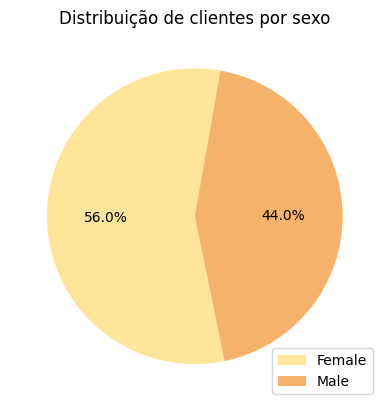

In [36]:
plt.pie(df['Gender'].value_counts(), startangle = 80, colors=['#ffe599', '#f6b26b'], autopct="%1.1f%%" )
plt.rc('font' , size=10)
plt.title('Distribuição de clientes por sexo')
plt.legend(labels = ['Female', 'Male'], loc="lower right")
plt.show()

### Gastos anual por sexo

Text(0.5, 1.0, 'Renda Anual Média por Gênero')

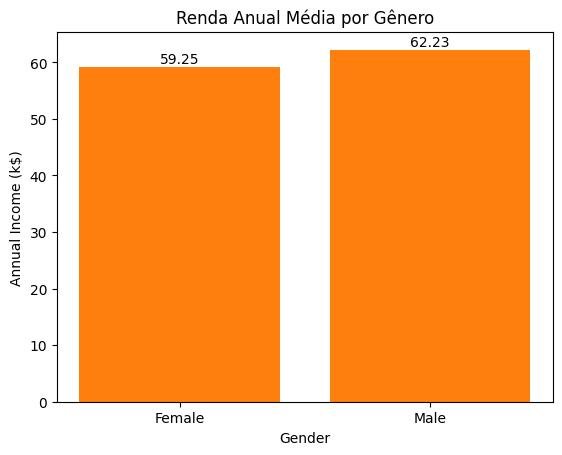

In [51]:
means = df.groupby('Gender')['Annual Income (k$)'].mean()

plt.bar(means.index, means)

means = df.groupby('Gender')['Annual Income (k$)'].mean()

colors = {'Male': '#ffe599', 'Female': '#f6b26b'}

plt.bar(means.index, means, color=['#f6b26b','#ffe599'])
plt.bar_label(plt.bar(means.index, means), labels=means.round(2))
plt.xlabel('Gender')
plt.ylabel('Annual Income (k$)')
plt.title('Renda Anual Média por Gênero')